# Judge a Book

## Analysis of what makes a good children's book bookcover.

---

We will be analyzing children's book data from goodreads.com, AWS Rekognition image labels data of the book covers of the children's books, and color histogram data provided by OpenCV.

### Introduction:
>Have you ever walked into a bookstore and a book caught your eye? Was it because of the title of the book or that it was placed in the Best Sellers Section? Or was it because of the illustration of the book cover?

>The purpose of this project to analyze the book covers from children's books and find out what features on a book covers make them popular.

### Summary

>In this notebook, I explore the image label data collected from AWS Boto3 Rekognition and color histograms from OpenCV. Then I will analyze their distributions and statistical significance to the average rating of the book.

# Let's get started

## Methodology

1. Importing the necessary libraries.
2. Reading dataset.
3. Data Exploration.
4. Data Analysis/Statistical Testing



## 1: Importing the necessary libraries

- [**Pandas:**](https://pandas.pydata.org/pandas-docs/stable/) I am using Pandas to store the book cover data in a data frame to perform data analysis because of its ease of use and flexibility in manipulating data.
- [**Numpy:**](https://numpy.org/devdocs/) Numpy is used in this project primarily to perform aggregations on sets of data.
- [**Matplotlib**](https://matplotlib.org/contents.html) & [**Seaborn:**](https://seaborn.pydata.org/introduction.html) I am using Matplotlib and Seaborn for data visualizations of my analytic insights.
- [**Scipy:**](https://www.scipy.org/getting-started.html) All statistical testing will be done using test within the Scipy library.

In [1]:
#Importing the required libraries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt, image as mpimg
import seaborn as sns
from scipy.stats import pearsonr, ttest_ind, chi2_contingency

---

## 2: Reading dataset

The dataset **BookLabels_Histograms_RBG.pkl** was compiled using the *Data_Wrangling* jupyter notebook from the following 3 data sources.    
Details of the notebook and the sources of data can be found [here](https://github.com/gordonchen07/Judge_a_book/blob/scale_image_collector/1_Data_Wrangling.ipynb).

In [12]:
# Loading dataset into a Pandas DataFrame

df = pd.read_pickle('Datasets/BookLabels_Histograms_RBG.pkl')
pd.set_option('display.max_columns', None)

---

## 3: Data Exploration

In [10]:
# Looking at the first 5 rows of the dataset

df.head()

,ISBN,Name,Confidence,Instances,Num_Instances,isbn_x,text_reviews_count,series,country_code,language_code,popular_shelves,asin,is_ebook,average_rating,kindle_asin,similar_books,description,format,link,authors,publisher,num_pages,publication_day,isbn13,publication_month,edition_information,publication_year,url,image_url,book_id,ratings_count,work_id,title,title_without_series,Unnamed: 0,isbn_y,blue_0,green_0,red_0,blue_1,green_1,red_1,blue_2,green_2,red_2,blue_3,green_3,red_3,blue_4,green_4,red_4,blue_5,green_5,red_5,blue_6,green_6,red_6,blue_7,green_7,red_7,blue_8,green_8,red_8,blue_9,green_9,red_9,blue_10,green_10,red_10,blue_11,green_11,red_11,blue_12,green_12,red_12,blue_13,green_13,red_13,blue_14,green_14,red_14,blue_15,green_15,red_15,blue_16,green_16,red_16,blue_17,green_17,red_17,blue_18,green_18,red_18,blue_19,green_19,red_19,blue_20,green_20,red_20,blue_21,green_21,red_21,blue_22,green_22,red_22,blue_23,green_23,red_23,blue_24,green_24,red_24,blue_25,green_25,red_25,blue_26,green_26,red_26,blue_27,green_27,red_27,blue_28,green_28,red_28,blue_29,green_29,red_29,blue_30,green_30,red_30,blue_31,green_31,red_31,isbn,blue,green,red
0,0001642081,Text,99.816299,[],0,0001642081,4,[265777],US,,"[{'count': '12', 'name': 'to-read'}, {'count':...",,false,4.09,,[],,Hardcover,https://www.goodreads.com/book/show/2657015-ba...,"[{'author_id': '14254497', 'role': ''}]",Collins,160,,9780001642089,,,1970,https://www.goodreads.com/book/show/2657015-ba...,https://images.gr-assets.com/books/1307384593m...,2657015,32,2681793,"Ballet for Laura (Laura, #1)","Ballet for Laura (Laura, #1)",1224,0001642081,13.0,13.0,13.0,12.0,12.0,12.0,11.0,11.0,11.0,14.0,14.0,14.0,24.0,24.0,24.0,30.0,30.0,30.0,20.0,20.0,20.0,30.0,30.0,30.0,17.0,17.0,17.0,38.0,38.0,38.0,47.0,47.0,47.0,37.0,37.0,37.0,64.0,64.0,64.0,67.0,67.0,67.0,69.0,69.0,69.0,75.0,75.0,75.0,66.0,66.0,66.0,60.0,60.0,60.0,87.0,87.0,87.0,90.0,90.0,90.0,113.0,113.0,113.0,108.0,108.0,108.0,155.0,155.0,155.0,135.0,135.0,135.0,137.0,137.0,137.0,150.0,150.0,150.0,156.0,156.0,156.0,150.0,150.0,150.0,151.0,151.0,151.0,176.0,176.0,176.0,563.0,563.0,563.0,20175.0,20175.0,20175.0,0001642081,245.482292,245.482292,245.482292
1,0001642081,Menu,88.789520,"[{'BoundingBox': {'Width': 0.9102855324745178,...",1,0001642081,4,[265777],US,,"[{'count': '12', 'name': 'to-read'}, {'count':...",,false,4.09,,[],,Hardcover,https://www.goodreads.com/book/show/2657015-ba...,"[{'author_id': '14254497', 'role': ''}]",Collins,160,,9780001642089,,,1970,https://www.goodreads.com/book/show/2657015-ba...,https://images.gr-assets.com/books/1307384593m...,2657015,32,2681793,"Ballet for Laura (Laura, #1)","Ballet for Laura (Laura, #1)",1224,0001642081,13.0,13.0,13.0,12.0,12.0,12.0,11.0,11.0,11.0,14.0,14.0,14.0,24.0,24.0,24.0,30.0,30.0,30.0,20.0,20.0,20.0,30.0,30.0,30.0,17.0,17.0,17.0,38.0,38.0,38.0,47.0,47.0,47.0,37.0,37.0,37.0,64.0,64.0,64.0,67.0,67.0,67.0,69.0,69.0,69.0,75.0,75.0,75.0,66.0,66.0,66.0,60.0,60.0,60.0,87.0,87.0,87.0,90.0,90.0,90.0,113.0,113.0,113.0,108.0,108.0,108.0,155.0,155.0,155.0,135.0,135.0,135.0,137.0,137.0,137.0,150.0,150.0,150.0,156.0,156.0,156.0,150.0,150.0,150.0,151.0,151.0,151.0,176.0,176.0,176.0,563.0,563.0,563.0,20175.0,20175.0,20175.0,0001642081,245.482292,245.482292,245.482292
2,0001642081,Label,86.814842,[],0,0001642081,4,[265777],US,,"[{'count': '12', 'name': 'to-read'}, {'count':...",,false,4.09,,[],,Hardcover,https://www.goodreads.com/book/show/2657015-ba...,"[{'author_id': '14254497', 'role': ''}]",Collins,160,,9780001642089,,,1970,https://www.goodreads.com/book/show/2657015-ba...,https://images.gr-assets.com/books/1307384593m...,2657015,32,2681793,"Ballet for Laura (Laura, #1)","Ballet for Laura (Laura, #1)",1224,0001642081,13.0,13.0,13.0,12.0,12.0,12.0,11.0,11.0,11.0,14.0,14.0,14.0,24.0,24.0,24.0,30.0,30.0,30.0,20.0,20.0,20.0,30.0,30.0,30.0,17.0,17.0,17.0,38.0,38.0,38.0,47.0,47.0,47.0,37.0,37.0,37.0,64.0,64.0,64.0,67.0,67.0,67.0,69.0,69.0,69.0,75.0,75.0,75.0,66.0,66.0,66.0,60.0,60.0,60.0,87.0,87.0,8

>As we can see from the dataset, there are 136 columns. The ISBN column shows multiples of the same values because each row represents a label identified <br>by the AWS Rekognition image label detector. The color histogram data was stored as a series of 32 bins per color(ie. 'blue_2') to represent the total range of <br>256 values. The number of pixels of a certain color is store as an integer value in the designated color bin. The last 3 columns contains the 
value of the mean value of each color.

In [260]:
# Checking the size of the dataset

df.shape

(66528, 136)

In [264]:
# Drop duplicate columns of isbn

df.drop(columns=['isbn_x', 'isbn_y', 'isbn'], inplace=True)

### Distribution of color mean values

In [266]:
# Observing the distribution of the 3 color mean values

df[['red','blue','green']].describe()

,red,blue,green
count,66528.000000,66528.000000,66528.000000
mean,165.026054,142.047527,157.737589
std,49.548351,52.046555,47.627493
min,4.897329,3.264738,3.253530
25%,130.674228,104.899187,124.263384
50%,170.055839,140.353887,159.732537
75%,202.748557,177.597147,191.351275
max,255.000000,255.000000,255.000000


### Confidence Distribution

In [11]:
# Observing the distribution of the Confidence levels of the labels provided by AWS Rekognition

df['Confidence'].describe()

count    66528.000000
mean        77.125075
std         14.471641
min         55.000832
25%         63.476662
50%         76.743393
75%         90.676348
max        100.000000
Name: Confidence, dtype: float64

>After reviewing the book cover images, the assigned labels, and their confidence levels using the [Image_viewer.ipynb jupyter notebook](https://github.com/gordonchen07/Judge_a_book/blob/scale_image_collector/Image_viewer.ipynb), I found that a confidence level of 70 is a good cutoff for accurate labels.

In [267]:
# Create dataframe where confidence levels of labels are above 70

Conf_70 = df[(df['Confidence'] > 70)]

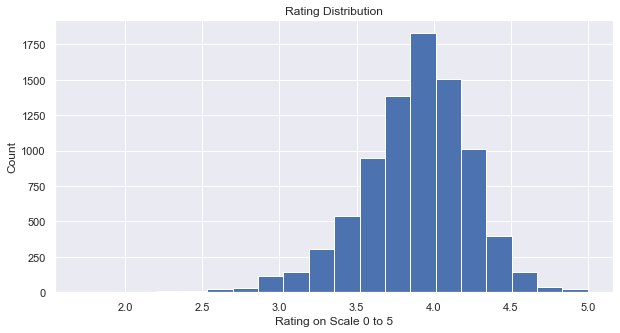

In [275]:
# Grouping Conf_70 by ISBN and aggregating the mean of the average_rating.
# Then plotting on histogram to see distribution of the average_rating

isbn_rating = Conf_70.groupby('ISBN').average_rating.mean().reset_index()
plt.figure(figsize=(10,5))
plt.hist(isbn_rating.average_rating, bins=20)
plt.title('Rating Distribution')
plt.xlabel('Rating on Scale 0 to 5')
plt.ylabel('Count')
plt.show()

In [282]:
# Descriptive statistics on the average_rating

isbn_rating.describe()

,average_rating
count,8454.000000
mean,3.882648
std,0.356863
min,1.710000
25%,3.680000
50%,3.910000
75%,4.120000
max,5.000000


>As we can see from the histogram plot, the distribution of the average_rating follows a normal distribution with the mean and median around 3.9. <br>This is confirmed by descriptive statistics where the mean is 3.88 and median is 3.91.

In [284]:
# Create descriptive statistics dataframe of the average_rating of every label

label_rating = Conf_70.groupby('Name').average_rating.describe()
label_rating

,count,mean,std,min,25%,50%,75%,max
Name,,,,,,,,
Aardvark,3.0,4.050000,0.205183,3.84,3.9500,4.06,4.1550,4.25
Absinthe,4.0,4.110000,0.280595,3.71,4.0175,4.21,4.3025,4.31
Abyssinian,5.0,3.996000,0.123814,3.84,3.9300,3.98,4.0700,4.16
Accessories,19.0,3.938421,0.309574,3.31,3.7400,3.92,4.0900,4.45
Accessory,8.0,3.872500,0.319184,3.31,3.7700,3.85,3.9775,4.40
...,...,...,...,...,...,...,...,...
Worship,6.0,4.093333,0.293644,3.60,3.9875,4.13,4.2875,4.42
Wrist,1.0,3.820000,NaN,3.82,3.8200,3.82,3.8200,3.82
Yard,4.0,3.952500,0.194487,3.76,3.8050,3.94,4.0875,4.17


In [286]:
# Create column for difference of median and mean then sorting by its greatest difference

label_rating['median-mean'] = abs(label_rating['50%'] - label_rating['mean'])
label_rating.sort_values(by='median-mean',ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max,median-mean
Name,,,,,,,,,
Eagle,5.0,3.244000,0.835392,1.88,3.000,3.700,3.8200,3.82,0.456000
Medication,3.0,3.560000,1.154686,2.25,3.125,4.000,4.2150,4.43,0.440000
Pill,3.0,3.560000,1.154686,2.25,3.125,4.000,4.2150,4.43,0.440000
Beak,7.0,3.727143,0.855136,1.88,3.675,4.120,4.2350,4.27,0.392857
Dodo,4.0,3.367500,1.014672,1.88,3.155,3.745,3.9575,4.10,0.377500
Reef,3.0,3.773333,0.609289,3.07,3.590,4.110,4.1250,4.14,0.336667
Train Track,3.0,4.296667,0.609617,3.92,3.945,3.970,4.4850,5.00,0.326667
Rail,3.0,4.296667,0.609617,3.92,3.945,3.970,4.4850,5.00,0.326667
Railway,3.0,4.296667,0.609617,3.92,3.945,3.970,4.4850,5.00,0.326667


>We can see the labels with the greatest median-mean values have low count. So lets filter the labels that have greater than 10 counts.

In [289]:
# Filter label_rating to labels that have greater than 10 counts.
# Sort by greatest median-mean value.

label_rating[label_rating['count'] > 10].sort_values(by='median-mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max,median-mean
Name,,,,,,,,,
Green,11.0,3.898182,0.412839,3.13,3.6250,4.060,4.1750,4.50,0.161818
Rodent,31.0,3.961290,0.449672,2.88,3.7250,4.100,4.1700,5.00,0.138710
Confectionery,27.0,3.832222,0.521502,2.25,3.4750,3.960,4.1150,5.00,0.127778
Grass,29.0,3.926552,0.302493,3.00,3.7300,4.050,4.1600,4.39,0.123448
Greeting Card,105.0,3.878952,0.435060,2.60,3.6700,4.000,4.1600,5.00,0.121048
...,...,...,...,...,...,...,...,...,...
Legend of Zelda,11.0,3.908182,0.412403,3.27,3.7050,3.910,4.2250,4.46,0.001818
Coat,28.0,3.838571,0.281184,3.37,3.6425,3.840,3.9550,4.70,0.001429
Symbol,120.0,3.908667,0.331860,3.11,3.6900,3.910,4.1325,4.57,0.001333


>We can see the median-mean value is still relatively high so lets filter the labels that have greater than 30 count.

In [290]:
label_rating[label_rating['count'] > 30].sort_values(by='mean', ascending=True).head(20)

,count,mean,std,min,25%,50%,75%,max,median-mean
Name,,,,,,,,,
Winter,45.0,3.741778,0.448767,2.60,3.4100,3.790,4.1000,4.49,0.048222
Birthday Cake,67.0,3.768955,0.419961,1.71,3.6150,3.870,4.0000,4.42,0.101045
Cake,63.0,3.770476,0.431260,1.71,3.5800,3.850,4.0450,4.42,0.079524
Snowman,56.0,3.775357,0.444195,2.60,3.4525,3.810,4.1700,4.49,0.034643
Transportation,179.0,3.784581,0.377584,2.67,3.5700,3.810,4.0400,5.00,0.025419
Vehicle,177.0,3.786893,0.378320,2.67,3.5700,3.810,4.0600,5.00,0.023107
Dessert,68.0,3.788676,0.416072,1.71,3.5800,3.860,4.0800,4.42,0.071324
Leisure Activities,209.0,3.802392,0.345468,2.60,3.5800,3.860,4.0500,4.62,0.057608
Sweets,52.0,3.804423,0.466717,2.25,3.4775,3.830,4.1125,5.00,0.025577


In [297]:
label_rating[label_rating['count'] > 30].sort_values(by='50%', ascending=True).head(20)

,count,mean,std,min,25%,50%,75%,max,median-mean
Name,,,,,,,,,
Winter,45.0,3.741778,0.448767,2.60,3.4100,3.790,4.1000,4.49,0.048222
Jigsaw Puzzle,32.0,3.821562,0.364755,3.00,3.5750,3.805,4.0575,4.50,0.016563
Snowman,56.0,3.775357,0.444195,2.60,3.4525,3.810,4.1700,4.49,0.034643
Panoramic,37.0,3.868378,0.361705,3.25,3.6500,3.810,4.0900,4.88,0.058378
Vehicle,177.0,3.786893,0.378320,2.67,3.5700,3.810,4.0600,5.00,0.023107
Transportation,179.0,3.784581,0.377584,2.67,3.5700,3.810,4.0400,5.00,0.025419
Snow,67.0,3.805373,0.447811,2.60,3.5450,3.820,4.1750,4.71,0.014627
Sweets,52.0,3.804423,0.466717,2.25,3.4775,3.830,4.1125,5.00,0.025577
Alphabet,37.0,3.809459,0.375943,2.80,3.5600,3.830,3.9900,4.62,0.020541


In [291]:
label_rating[label_rating['count'] > 10].sort_values(by='50%', ascending=False)

,count,mean,std,min,25%,50%,75%,max,median-mean
Name,,,,,,,,,
Jar,15.0,4.170667,0.300534,3.38,4.1350,4.250,4.3250,4.51,0.079333
Vase,12.0,4.127500,0.316777,3.38,4.1200,4.230,4.2700,4.45,0.102500
Pottery,15.0,4.114000,0.236365,3.61,4.0150,4.150,4.2500,4.41,0.036000
Sticker,14.0,4.073571,0.323956,3.55,3.8200,4.125,4.2900,4.56,0.051429
Bear,17.0,4.048235,0.243804,3.65,3.8600,4.110,4.1500,4.53,0.061765
...,...,...,...,...,...,...,...,...,...
Diaper,26.0,3.716538,0.349387,2.92,3.5975,3.700,3.9150,4.42,0.016538
Disk,26.0,3.734231,0.408110,3.00,3.5225,3.700,3.9275,4.50,0.034231
Vegetable,15.0,3.743333,0.448261,2.90,3.5000,3.690,4.1050,4.36,0.053333


---

## 4: Data Analysis/Statistical Testing

#### 1) Do books with more labels correlate with higher ratings?

In [25]:
# Create new dataframe with by grouping the ISBN and average_rating and aggregating the labels count

rating_numlabels = df.groupby(['ISBN', 'average_rating'])[['Name']].count().reset_index()

In [27]:
rating_numlabels.describe()

,average_rating,Name
count,8765.000000,8765.000000
mean,3.879479,7.590188
std,0.358057,2.459344
min,1.710000,1.000000
25%,3.680000,6.000000
50%,3.910000,8.000000
75%,4.120000,10.000000
max,5.000000,10.000000


In [299]:
#Calculate correlation with scipy pearsonr. (Correlation, P-value)

result = pearsonr(rating_numlabels['average_rating'], rating_numlabels['Name'])
print('Pearson Correlation Coefficient: {}'.format(result[0]))
print('P-value: {}'.format(result[1]))

Pearson Correlation Coefficient: 0.003588899529455455
P-value: 0.736907364279449


>There is no statistical signifance between the number of labels and the average_rating. Having more labels does not correlate with a higher rating.

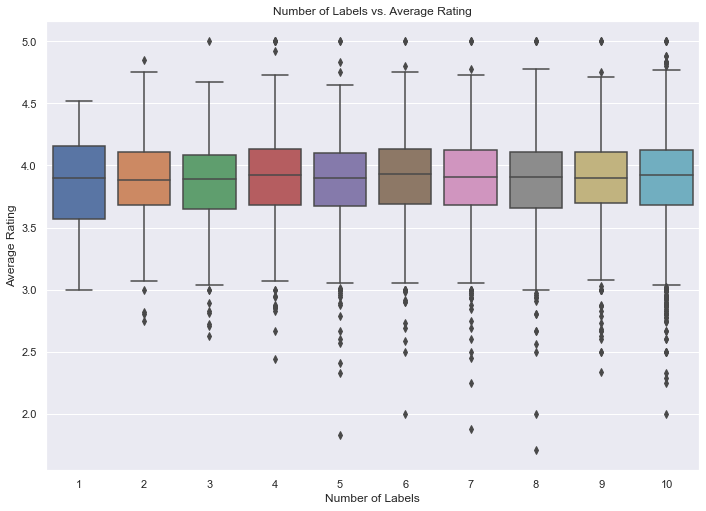

In [310]:
sns.boxplot(data=rating_numlabels, x='Name', y='average_rating')
plt.xlabel('Number of Labels')
plt.ylabel('Average Rating')
plt.title('Number of Labels vs. Average Rating')
plt.show()

>There is no significant difference in the median or the distribution for books with 2 or more labels. There is a little more variation in the rating for books with only 1 label.

#### 2) Does the color of book covers correlate with ratings?

- I will first look at the correlation between the shade of each color to ratings.
- Then I will look at the correlation between the ratio of each color to ratings.

***Red***

In [317]:
print('Pearson Correlation Coefficient: {}'.format(pearsonr(df['average_rating'], df['red'])[0]))
print('P-value: {}'.format(pearsonr(df['average_rating'], df['red'])[1]))

Pearson Correlation Coefficient: -0.010159096008745629
P-value: 0.008783794616707315


>The p-value(<0.05) indicates the shade of red is statistically significant with average ratings but only has a slight negative correlation.

In [305]:
# Generate the ratio of reds to the total composition

df['red_comp'] = df['red']/(df['red']+ df['blue']+df['green'])

In [319]:
print('Pearson Correlation Coefficient: {}'.format(pearsonr(df['red_comp'], df['average_rating'])[0]))
print('P-value: {}'.format(pearsonr(df['red_comp'], df['average_rating'])[1]))

Pearson Correlation Coefficient: -0.014904522376739362
P-value: 0.00012081421301067239


>The p-value(<0.05) indicates the red_comp is statistically significant with average rating but only a very small negative correlation that is not impactful.

***Blue***

In [320]:
print('Pearson Correlation Coefficient: {}'.format(pearsonr(df['average_rating'], df['blue'])[0]))
print('P-value: {}'.format(pearsonr(df['average_rating'], df['blue'])[1]))

Pearson Correlation Coefficient: 0.005363273590039
P-value: 0.1665623825407404


>The p-value(>0.05) indicates the shade of blue has no statistical significance with average ratings

In [322]:
# Generate the ratio of blues to the total composition

df['blue_comp'] = df['blue']/(df['red']+ df['blue']+df['green'])
print('Pearson Correlation Coefficient: {}'.format(pearsonr(df['blue_comp'], df['average_rating'])[0]))
print('P-value: {}'.format(pearsonr(df['blue_comp'], df['average_rating'])[1]))

Pearson Correlation Coefficient: 0.009215561546996178
P-value: 0.01745514558036444


>The p-value(<0.05) indicates the blue_comp is statistically significant with average rating but only a very small positive correlation that is not impactful.

***Green***

In [323]:
print('Pearson Correlation Coefficient: {}'.format(pearsonr(df['average_rating'], df['green'])[0]))
print('P-value: {}'.format(pearsonr(df['average_rating'], df['green'])[1]))

Pearson Correlation Coefficient: 0.0024701409276300518
P-value: 0.5240512403939542


>The shade of green has no statistical significance with average ratings.

In [324]:
# Generate the ratio of greens to the total composition

df['green_comp'] = df['green']/(df['red']+ df['blue']+df['green'])
print('Pearson Correlation Coefficient: {}'.format(pearsonr(df['green_comp'], df['average_rating'])[0]))
print('P-value: {}'.format(pearsonr(df['green_comp'], df['average_rating'])[1]))

Pearson Correlation Coefficient: 0.011378002547094195
P-value: 0.0033379438294177757


>The p-value(<0.05) indicates the green_comp is statistically significant with average rating but only very small positive correlation that is not impactful.

#### 3) Does exposure correlate with average ratings?

In [45]:
df['exp_sum'] = (df['red']+df['blue']+df['green'])/765

In [48]:
pearsonr(df['average_rating'], df['exp_sum'])

(-0.000790030277323156, 0.8385341058523426)

>The p-value(>0.05) indicates the exp_sum is not statistically significant to the average rating. This means that the exposure of the book covers does not correllate with ratings.

#### 4) Does exposure correlate with the confidence of labels?

In [50]:
df.groupby(['exp_sum'])['Confidence'].mean().reset_index().head(20)

,exp_sum,Confidence
0,0.018617,71.787441
1,0.039238,92.335699
2,0.044766,68.303818
3,0.053519,71.881505
4,0.060905,81.115637
5,0.067324,70.564159
6,0.072684,61.660407
7,0.074146,70.772261
8,0.074520,69.297930
9,0.075964,91.344990


In [51]:
pearsonr(df['exp_sum'], df['Confidence'])

(-0.013985990016231221, 0.0003091398952088432)

>The p-value(<0.05) indicates the exp_sum is statistically significant with Confidence but very small. There is a slight negative correlation that is not impactful.

#### 5)Does the presence of animal labels correlate with higher ratings?

In [7]:
# Create a new dataframe called has_animal of book covers that have animals.

df['animal'] = df['Name'].map(lambda x: x == 'Animal')
has_animal = df[df['animal'] == True]

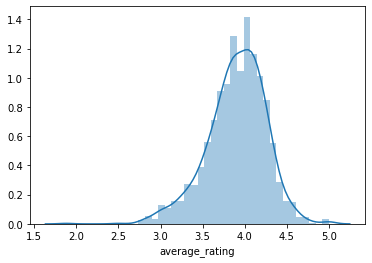

In [8]:
sns.distplot(has_animal['average_rating'])

>The average rating for book covers with animal(s) has a normal distribution with a slight left skew.

In [9]:
# Create new dataframe called no_animals of the book cover that have no animals.

no_animals = df[df['animal'] == False]

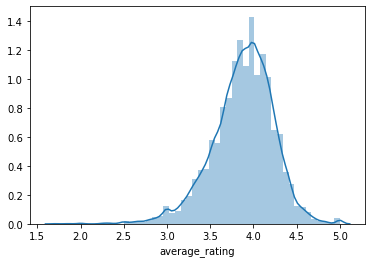

In [10]:
sns.distplot(no_animals['average_rating'])

>The average rating for book covers without animals has a normal distribution with a slight left skew as well.

In [57]:
df.groupby('animal').average_rating.mean()

animal
False    3.879456
True     3.900438
Name: average_rating, dtype: float64

**2 sample T-test**

*We perform a 2 sample T-test to test the difference between the population means of no_animals and has_animal.*

In [58]:
ttest_ind(no_animals['average_rating'], has_animal['average_rating'], equal_var=False)

Ttest_indResult(statistic=-2.2093183677049657, pvalue=0.027307951555174223)

>We reject the Null Hypothesis (p-value < 0.05). There is a statistically significant difference between the group means.

In [59]:
df.groupby('animal').average_rating.describe()

,count,mean,std,min,25%,50%,75%,max
animal,,,,,,,,
False,65136.0,3.879456,0.357491,1.71,3.68,3.910,4.12,5.0
True,1392.0,3.900438,0.350460,1.88,3.70,3.925,4.14,5.0


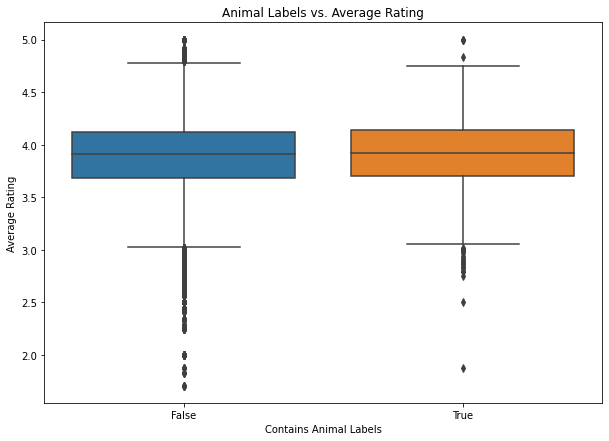

In [14]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df, x='animal', y='average_rating')
plt.title('Animal Labels vs. Average Rating')
plt.xlabel('Contains Animal Labels')
plt.ylabel('Average Rating')
plt.show()

#### 6) Does the number of ratings correlate with the average rating?

In [116]:
pearsonr(df['ratings_count'], df['average_rating'])

(0.062050199893882156, 9.301082549240172e-58)

>Yes, there is statistical significance between the number of ratings and the average rating but the correlation is weak.

#### 7) Do the presence of labels related to pets correlate with higher ratings?

In [19]:
# List of labels associated with pets

pets = ['Pet', 'Dog', 'Cat', 'Canine', 'Fish', 'Rodent']

In [20]:
# Create new feature to indicate if a label is associated with pets

df['pet'] = df['Name'].map(lambda x: x in pets)

In [17]:
df.pet.value_counts()

False    65893
True       635
Name: pet, dtype: int64

In [21]:
# Create two dataframes, one of book covers with pet labels and one without pet labels.

has_pets = df[df['pet'] == True]
no_pets = df[df['pet'] == False]

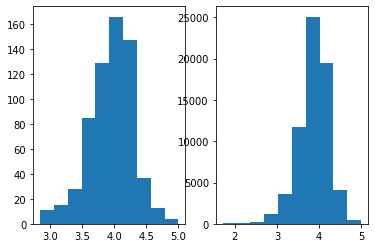

In [22]:
#Check if normally distributed
plt.subplot(1,2,1)
plt.hist(has_pets['average_rating'])
plt.subplot(1,2,2)
plt.hist(no_pets['average_rating'])
plt.show()

>Both dataframes appear to have a normal distribution of average rating.

In [25]:
has_pets.average_rating.describe()

count    635.000000
mean       3.960567
std        0.340581
min        2.850000
25%        3.780000
50%        4.000000
75%        4.190000
max        5.000000
Name: average_rating, dtype: float64

In [26]:
no_pets.average_rating.describe()

count    65893.000000
mean         3.879118
std          0.357427
min          1.710000
25%          3.680000
50%          3.910000
75%          4.120000
max          5.000000
Name: average_rating, dtype: float64

In [118]:
print(ttest_ind(has_pets['average_rating'], no_pets['average_rating']))

Ttest_indResult(statistic=5.7173535078016915, pvalue=1.0865741767851017e-08)


>There is a statistically significant difference (p-value < 0.05) between the average ratings of the book covers with pets and those without pets.

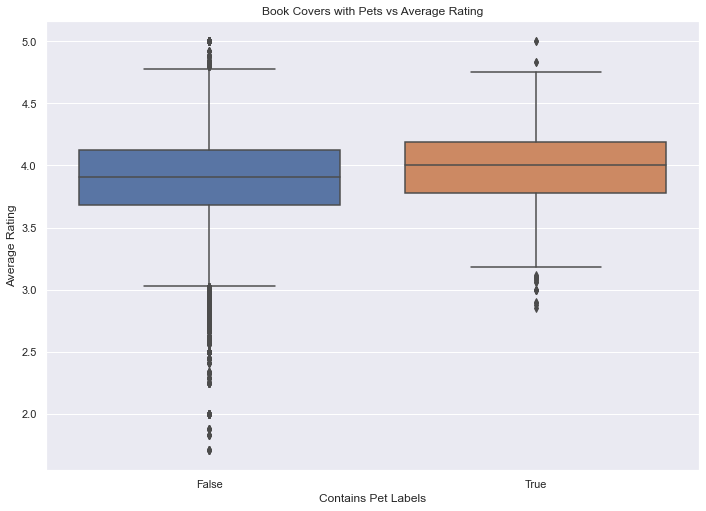

In [28]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(data=df, x='pet', y='average_rating')
plt.title('Book Covers with Pets vs Average Rating')
plt.xlabel('Contains Pet Labels')
plt.ylabel('Average Rating')
plt.show()

#### 8) Do the presence of labels related to astronomy correlate with higher ratings?

In [29]:
# List of labels associated with astronomy

astronomy = ['Astronomy', 'Outer Space', 'Astronaut', 'Planet', 'Meteor', 'Comet', 'Sun', 'Earth', 'Mars', 'Star', 'Rocket', 'Spaceship']

In [30]:
# Create new feature to indicate if a label is associated with astronomy

df['astronomy'] = df['Name'].isin(astronomy)

In [31]:
# Create two dataframes, one of book covers with astronomy labels and one without astronomy labels.

has_astro = df[df['Name'].isin(astronomy)]
no_astro = df[~df['Name'].isin(astronomy)]

In [33]:
has_astro.average_rating.describe()

count    137.000000
mean       3.997080
std        0.385481
min        2.840000
25%        3.750000
50%        3.920000
75%        4.170000
max        4.830000
Name: average_rating, dtype: float64

In [34]:
no_astro.average_rating.describe()

count    66391.000000
mean         3.879653
std          0.357259
min          1.710000
25%          3.680000
50%          3.910000
75%          4.120000
max          5.000000
Name: average_rating, dtype: float64

In [35]:
ttest_ind(has_astro['average_rating'], no_astro['average_rating'])

Ttest_indResult(statistic=3.8426034728789564, pvalue=0.00012184905745404294)

>P-value < 0.05. There is a significant difference between the ratings for books with and without astronomy related labels.

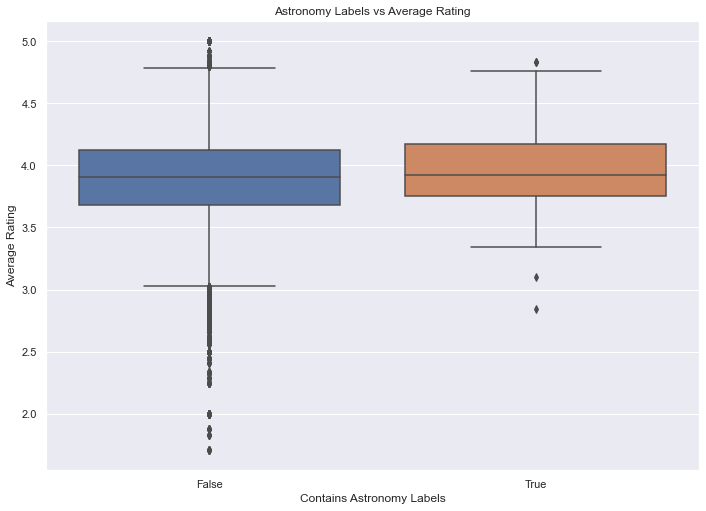

In [36]:
sns.boxplot(data=df, x='astronomy', y='average_rating')
plt.title('Astronomy Labels vs Average Rating')
plt.xlabel('Contains Astronomy Labels')
plt.ylabel('Average Rating')
plt.show()

#### 9) Does the presence of water labels correlate with the rating?

In [37]:
# List of labels associated with water

water = ['Water', 'Ocean', 'Sea', 'Aquarium', 'Waterfall', 'Wave']

In [38]:
# Create new feature to indicate if a label is associated with water

df['water'] = df['Name'].isin(water)

In [39]:
# Create two dataframes, one of book covers with water labels and one without water labels

has_water = df[df['Name'].isin(water)]
no_water = df[~df['Name'].isin(water)]

In [40]:
ttest_ind(has_water['average_rating'], no_water['average_rating'])

Ttest_indResult(statistic=-0.4143279692923935, pvalue=0.678635268912909)

>P-value > 0.05. There is no significant difference between the ratings for books with and without water labels.

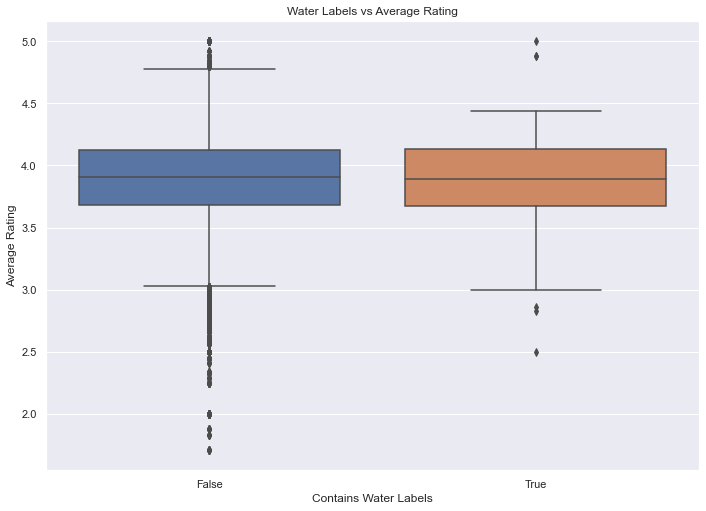

In [42]:
sns.boxplot(data=df, x='water', y='average_rating')
plt.title('Water Labels vs Average Rating')
plt.xlabel('Contains Water Labels')
plt.ylabel('Average Rating')
plt.show()

#### 10) Does the presence of people labels correlate with the rating?

In [43]:
#List of labels associated with people

people = ['People', 'Human', 'Man', 'Men', 'Woman', 'Women', 'Boy', 'Girl', 'Children', 'Child', 'Kid', 'Male', 'Female']

In [44]:
# Create new feature to indicate if a label is associated with people

df['people'] = df['Name'].isin(people)

In [45]:
# Create two dataframes, one of book covers with people labels and one without people labels

has_people = df[df['Name'].isin(people)]
no_people = df[~df['Name'].isin(people)]

In [46]:
ttest_ind(has_people['average_rating'], no_people['average_rating'])

Ttest_indResult(statistic=-0.8377532687058763, pvalue=0.40217229900593743)

>P-value > 0.05. There is no statistically significant difference between the ratings for books with and without people labels. <br>There could be noise in the data because putting people on book covers is very common.

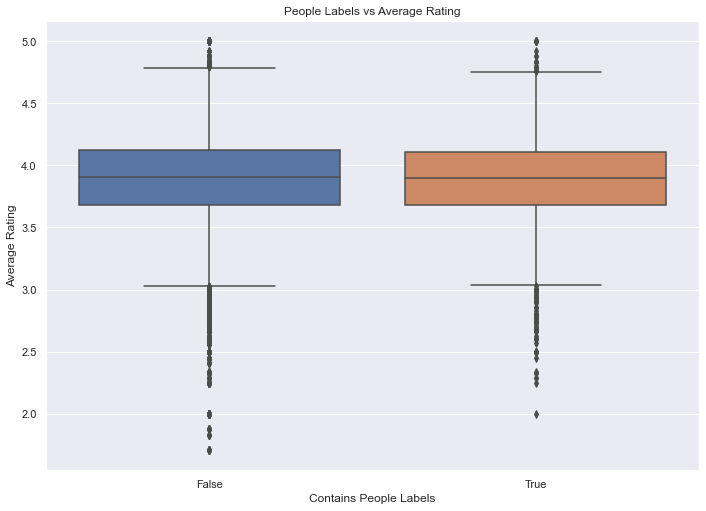

In [48]:
sns.boxplot(data=df, x='people', y='average_rating')
plt.title('People Labels vs Average Rating')
plt.xlabel('Contains People Labels')
plt.ylabel('Average Rating')
plt.show()

## 5: Discussion

In my analysis, I found that bookcover image labels provided by AWS Boto3 Rekognition that were associated with astronomy(p-value = 0.000121), pets(p-value = 1.086e-08), and animals(p-value = 0.0273) were statistically significant. This means that the ratings for books with those labels are statistically different the ratings for books without those labels. 
>A possible explanation for this is that children may be more curious about subjects like astronomy and animals(pets are a category under animals). One method to further explore this idea is to look into toys sales data and determine if astronomy and animals are popular themes for toys among children.

Surprisingly, ratings for books with image labels associated with people were not statistically different from books without people related labels with a p-value of 0.4. 
>A possible explanation for this is that children may not find books with people on the cover particularly interesting. One channel that I can look to pursue in the topic of people, is the age and ethnicity of the people on the book covers. Children may be interested in books with covers of children around their age and of the same ethnicity.

I also found that the shade of color red a bookcover has is statistically significant with the rating of the book.
>It is possible that the favorite color among children tend to be of a red hue. To find an explanation for this, we could look into clothing, toys, and other data sources where color plays a role in making selections